# 第６章非線形回帰 

In [12]:
import numpy as np
from numpy.random import randn
from matplotlib import pyplot as plt

## 6.1 多項式回帰 

- 回帰モデルを

$$
\hat{f}(x)
=
\hat{\beta_0} + \hat{\beta_1} x + \cdot + \hat{\beta_p} x^p
$$

とする。

- 教科書のコードひどすぎるから、書くのやめた。

## 6.2 スプライン回帰

教科書読んでから下のコードを理解する。

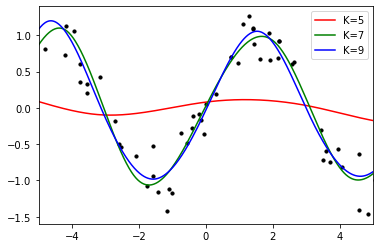

In [34]:
n = 100
x = randn(n) * 2 * np.pi
y = np.sin(x) + 0.2 * randn(n)
col_set = ['red', 'green', 'blue']
K_set = [5, 7, 9]
plt.scatter(x, y, c='black', s=10)
plt.xlim(-5, 5)

for k in range(3):
    K = K_set[k]
    # 領域を K 等分に分ける。
    knots = np.linspace(-2*np.pi, 2*np.pi, K)
    X = np.zeros((n, K+4))
    for i in range(n):
        X[i,0] = 1
        X[i,1] = x[i]
        X[i,2] = x[i]**2
        X[i,3] = x[i]**3
        for j in range(K):
            X[i, j+4] = np.maximum((x[i] - knots[j])**3, 0)
    beta = np.linalg.inv(X.T@X)
    beta = np.linalg.inv(X.T@X)@X.T@y
    def f(x):
        S = beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
        for j in range(K):
            S=S+beta[j+4]*np.maximum((x-knots[j])**3, 0)
        return S
    u_seq = np.arange(-5, 5, 0.02)
    v_seq = []
    for u in u_seq:
        v_seq.append(f(u))
    plt.plot(u_seq, v_seq, c=col_set[k], label="K={}".format(K))
plt.legend()

In [36]:
np.maximum(1, 2)

2